<a target="_blank" href="https://colab.research.google.com/github/echohuiecho/pytorch-practice/blob/master/computer-vision/multi-class-classification/pytorch_computer_vision_classification_MINST.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# PyTorch Computer Vision Exercise

## Objective

The following exercise is used to practice computer vision fundamentals in PyTorch for a multi-class classification problem.

## Dataset
- [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST)


## Model architecture

The model created is a convolutional neural network based on TinyVGG network architecture.

## Acknowledgement

The exercise is based on [Github Repo - Learn PyTorch for Deep Learning](https://github.com/mrdbourke/pytorch-deep-learning/). 

## 1. Checking the development environment and import libraries

In [1]:
# Check for GPU
!nvidia-smi

Tue Dec 27 09:46:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Import tqdm for the progress bar
from tqdm.auto import tqdm

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

1.13.0+cu116


## 2. Setup device agnostic code

In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device type: {device}")

Using device type: cuda


## 3. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Load MINST dataset
train_data = datasets.MNIST(
    root="data",    # Root directory of dataset
    train=True,
    download=True,
    transform=ToTensor(),   # Transform PIL format into Torch tensors
    target_transform=None   # Transform labels / targets
)

test_data = datasets.MNIST(
    root="data",    # Root directory of dataset
    train=False,
    download=True,
    transform=ToTensor(),   # Transform PIL format into Torch tensors
)

## 4. Visualize different samples of the MNIST training dataset.

In [5]:
# Print the number of samples in the dataset
print(f"Number of train data: {len(train_data.data)}")
print(f"Number of train targets: {len(train_data.targets)}\n")
print(f"Number of test data: {len(test_data.data)}")
print(f"Number of test targets: {len(test_data.targets)}\n")

# Print the class names of our dataset
class_names = train_data.classes
print(f"Class names: {class_names}\n")

# Check the shape of our trainig sample
first_image, first_label = train_data[0]
print(f"Image shape (of the first sample): {first_image.shape}")
print(f"Image label: {class_names[first_label]}")

Number of train data: 60000
Number of train targets: 60000

Number of test data: 10000
Number of test targets: 10000

Class names: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']

Image shape (of the first sample): torch.Size([1, 28, 28])
Image label: 5 - five


In [6]:
import matplotlib.pyplot as plt

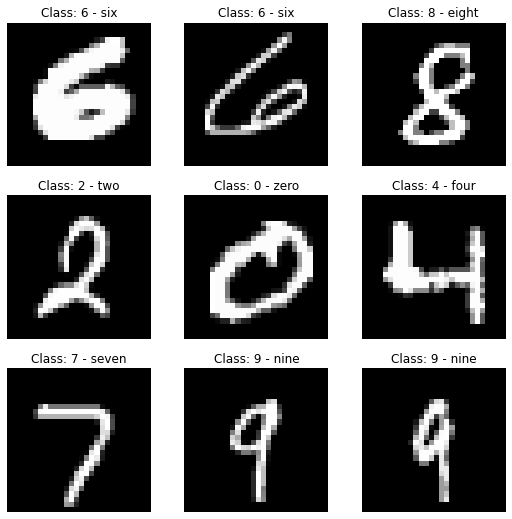

In [7]:
# Visualize different samples of the dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    # create a random index
    random_idx = torch.randint(0, len(train_data), size=[1]).item()

    # get a random data
    image, label = train_data[random_idx]

    # plot the random image and class name
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Class: {class_names[label]}")
    plt.axis(False);

## 5. Turn the train and test datasets into dataloaders

1. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`
2. Set the batch size to `32`

In [8]:
from torch.utils.data import DataLoader

# Setup hyperparameter - the batch size
BATCH_SIZE = 32

# Turn datasets into dataloaders
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Check our dataloaders
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of train dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of train dataloader: 313 batches of 32


## 6. Recreate the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/)

The recreated model is also known as TinyVGG, which is capable of fitting on the MNIST dataset.

In [9]:
# Create a convolutional neural network based on TinyVGG network architecture
from torch import nn
class MINSTModelV0(nn.Module):
    """Model architecture that replicates that TinyVGG
    model from CNN explainer website (https://poloclub.github.io/cnn-explainer/).
    """
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,
            out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)

        return x


In [10]:
INPUT_SHAPE = 1  # number of channels in our image
HIDDEN_UNITS = 10

In [11]:
# Create an instance of the model
model_0_gpu = MINSTModelV0(input_shape=INPUT_SHAPE,
                       hidden_units=HIDDEN_UNITS,
                       output_shape=len(class_names)).to(device)
model_0_gpu, next(model_0_gpu.parameters()).device

(MINSTModelV0(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ), device(type='cuda', index=0))

## 7. Create functions for training, testing and evaluation

In [12]:
# define a function for the training step
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """
    Performs a training loop step with model
    """
    train_loss, train_acc = 0, 0

    # Put model on training mode
    model.train()

    # Loop through training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss and acurracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(data_loader)

    # Divide total accuracy loss by length of train dataloader (average accuracy per batch per epoch)
    train_acc /= len(data_loader)
    
    # Print out how many samples have been seen
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [13]:
# define a function for the testing steps
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """
    Performs a testing loop step on model going over data_loader.
    """
    test_loss, test_acc = 0, 0

    # Put model on eval mode
    model.eval()

    with torch.inference_mode():
        # Loop through testing batches
        for X_test, y_test in data_loader:
            # Put data on target device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward pass
            test_pred = model(X_test)

            # 2. Calculate the loss and acurracy (per batch)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))  # logits -> prediction labels

        # Divide total test loss by length of test dataloader (average loss per batch per epoch)
        test_loss /= len(data_loader)

        # Divide total accuracy loss by length of test dataloader (average accuracy per batch per epoch)
        test_acc /= len(data_loader)
    
    # Print out the loss and accurary
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n\n")

In [14]:
def eval_model_V0(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  accuracy_fn,
                  device=device):
    """Returns a dictionary containing the results of model predicting 
    on dataloader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Put data on target device
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate the loss
            loss += loss_fn(y_pred, y)  # accumulate the loss every batch

            # 3. Calculate the accuracy
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        # Calculate the loss average per batch
        loss /= len(data_loader)

        # Calculate the accuracy average per batch
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_function.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading the `helper_functions.py`...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

## 8. Training and testing loop

In [17]:
# Setup a loss function
loss_fn = nn.CrossEntropyLoss()

# Setup a optimizer
optimizer = torch.optim.SGD(params=model_0_gpu.parameters(), 
                            lr=0.1)

# Import accuracy metric
from helper_functions import accuracy_fn, print_train_time

In [18]:
from timeit import default_timer as timer

# --- Train the model on gpu ---
# Set the random seed
torch.manual_seed(42)

# Start the timer for training the model on gpu
train_time_start_on_gpu = timer()

# Set the number of epochs
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} ---\n")

    # --- Training ---
    train_step(model=model_0_gpu,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    # --- Testing ---
    test_step(model=model_0_gpu,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = timer()
total_train_time_on_gpu = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 ---

Train loss: 0.31386 | Train acc: 89.42%
Test loss: 0.09052 | Test acc: 97.22%


Epoch: 1 ---

Train loss: 0.08059 | Train acc: 97.53%
Test loss: 0.06520 | Test acc: 97.94%


Epoch: 2 ---

Train loss: 0.06270 | Train acc: 98.05%
Test loss: 0.05154 | Test acc: 98.36%


Epoch: 3 ---

Train loss: 0.05271 | Train acc: 98.34%
Test loss: 0.04765 | Test acc: 98.38%


Epoch: 4 ---

Train loss: 0.04575 | Train acc: 98.59%
Test loss: 0.03624 | Test acc: 98.75%



Train time on cuda: 61.875 seconds


In [19]:
# Get model_0 results dictionary trained on gpu
model_0_results_gpu = eval_model_V0(model=model_0_gpu,
                                data_loader=test_dataloader,
                                loss_fn=loss_fn,
                                accuracy_fn=accuracy_fn,
                                device=device)
model_0_results_gpu

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MINSTModelV0',
 'model_loss': 0.03624395653605461,
 'model_acc': 98.75199680511182}

In [20]:
import pandas as pd
results_df = pd.DataFrame([model_0_results_gpu])
results_df

,model_name,model_loss,model_acc
0,MINSTModelV0,0.036244,98.751997


## 9. Make predictions using the trained model

In [21]:
def make_predictions(model: torch.nn.Module,
                     data_loader: torch.utils.data.DataLoader,
                     device: torch.device=device):
    """
    Return a tensor with the prediction labels
    """

    y_preds = []

    # Set model to evaluation mode
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader, desc="Making predictions..."):
            # Send data and targets to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            pred_logits = model(X)

            # 2. Turn predictions from logits -> prediction probabilities -> prediction labels
            y_pred = torch.softmax(pred_logits.squeeze(), dim=0).argmax(dim=1)

            # Move prediction probability back to CPU for further calculations
            y_preds.append(y_pred.cpu())

    return y_preds

In [22]:
# Make predictions
y_preds = make_predictions(model=model_0_gpu,
                           data_loader=test_dataloader)

# Concatenate list of predictions into a **single** tensor
print(f"List of predictions:\n {y_preds[:10]}")
y_pred_tensor = torch.cat(y_preds)
print(f"Concatenate into a single tensor:\n {y_pred_tensor[:50]}")

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

List of predictions:
 [tensor([7, 2, 1, 0, 4, 1, 8, 9, 8, 8, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 8, 6, 6, 5,
        8, 0, 7, 4, 0, 1, 3, 1]), tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 8, 3]), tensor([7, 9, 6, 4, 3, 0, 9, 0, 2, 9, 1, 7, 3, 2, 9, 7, 9, 5, 2, 7, 8, 4, 9, 3,
        6, 1, 3, 6, 9, 5, 1, 4]), tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 1, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5]), tensor([8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 9,
        5, 5, 1, 5, 6, 0, 3, 4]), tensor([1, 6, 5, 4, 6, 9, 4, 3, 1, 4, 9, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 3, 0,
        8, 9, 2, 9, 0, 1, 1, 1]), tensor([0, 8, 0, 8, 1, 6, 4, 8, 8, 6, 1, 1, 1, 8, 9, 5, 2, 9, 4, 8, 9, 7, 8, 0,
        3, 8, 5, 5, 7, 2, 2, 7]), tensor([1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 1, 4, 1, 6, 9, 6, 7, 1, 3, 0, 6,
        4, 1, 4, 1, 9, 5, 7, 7]), tensor([1, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 

In [23]:
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

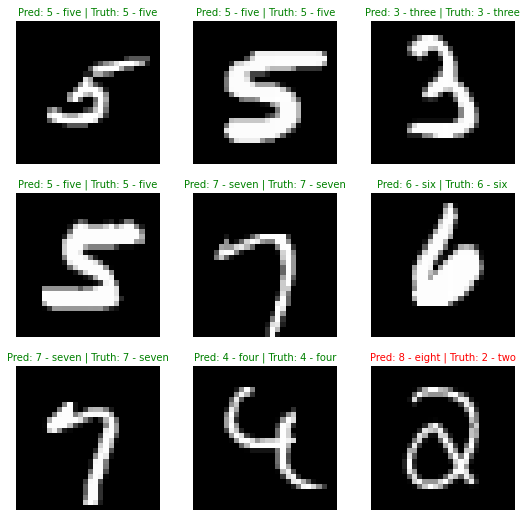

In [24]:
# Visualize different predictions of the dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    # Create a random index
    random_idx = torch.randint(0, len(test_data), size=[1]).item()

    # Get a random data from the testing dataset
    image, label = test_data[random_idx]
    # Get the truth label (in text form)
    truth_label = class_names[label]

    # Find the prediction (in text form)
    pred_label = class_names[y_pred_tensor[random_idx]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # plot the random prediction
    # Create subplot
    fig.add_subplot(rows, cols, i)

    # Plot the target image
    plt.imshow(image.squeeze(), cmap="gray")

    # Check for equality between pred and truth label (or test labels)
    # and change color of the title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")  # green text if prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c="r")  # red text if prediction not the same as truth

    plt.axis(False);

## 10. Plot a confusion matrix

The confusion matrix compares the model's predictions to the truth labels.

In [25]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0


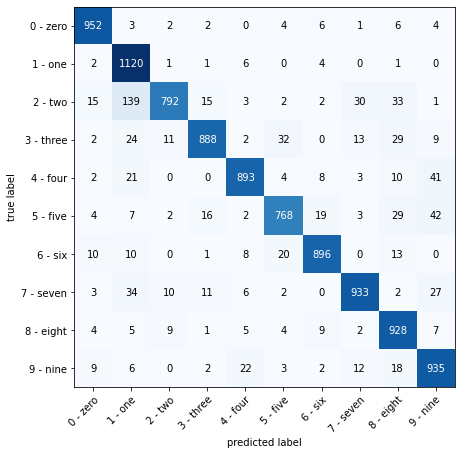

In [26]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
# Create an instance of the ConfusionMatrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
# Create a confusion matrix tensor
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)